<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regretion with Neural networks and tensroflow

There are many definitions of regression problem but in our cas, we're going to simplify it: predicting a numerial variable based on some other combination of variable, even shorter.. predicting a number

In [18]:
# Import tensorflow

import tensorflow as tf
print(tf.__version__)

2.15.0


##Creating data to view and fit

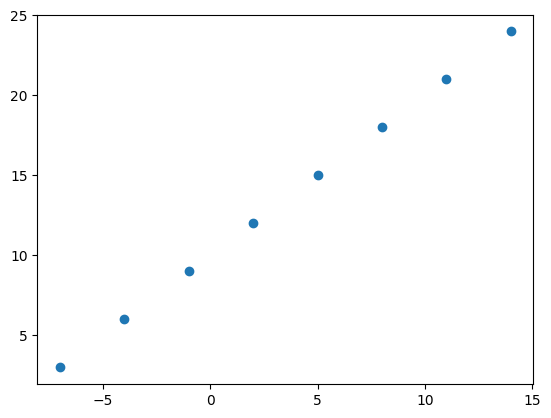

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labes
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y);

In [ ]:
y == X + 3

array([False, False, False, False, False, False, False, False])

# Input and output shapes

In [20]:
# Cerate a demo tensor for our housing prise prediction problema

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price



(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [21]:
X[0], y[0]

(-7.0, 3.0)

In [22]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
#Turn our numpy array into tensors

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

In [24]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

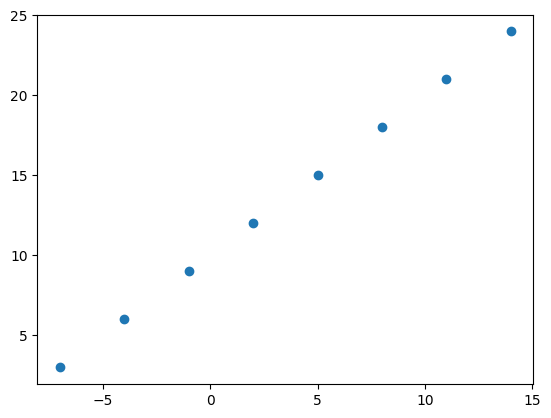

In [26]:
plt.scatter(X, y);

## Steps in omdelling eith tensroflow:

1. **Creating a model** - define the input and the output layers, as well as the
hidden layers of a deep learning model.
2. **Compiling  a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model to improe the patterns its learning) and evaluation metrics (what we can use to interpret perform of our model)
3. Fitting a model -  letting the model trye to find patterns between X & y (features and labels)

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])


# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=4)

Epoch 1/100
1/1 [==============================] - 0s 368ms/step - loss: 13.4974 - mae: 13.4974
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3649 - mae: 13.3649
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2324 - mae: 13.2324
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.0999 - mae: 13.0999
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9674 - mae: 12.9674
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8349 - mae: 12.8349
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7024 - mae: 12.7024
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5699 - mae: 12.5699
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4374 - mae: 12.4374
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3049 - mae: 12.3049
Epoch 11/100
1/1 [==============================] -

In [29]:
# Check X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Try and mahe a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.442749]], dtype=float32)

##Improving our model

We can improve our model, by altering the steps we took to create a model

1.**Creating a model** - here we might add more layers, increase the number of the hidden layers, change the activation function of each layer.

2.**Compiling a model** - here we might change the optimizantion function or perhaps the **learning rate** of the optimization function

3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [31]:
# Let rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9031 - mae: 12.9031
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7706 - mae: 12.7706
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6381 - mae: 12.6381
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5056 - mae: 12.5056
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3731 - mae: 12.3731
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2406 - mae: 12.2406
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1081 - mae: 12.1081
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9756 - mae: 11.9756
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8431 - mae: 11.8431
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7106 - mae: 11.7106
Epoch 11/100
1/1 [==============================] - 0s 9

In [33]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.938992]], dtype=float32)

In [44]:
# Let rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 13.8897 - mae: 13.8897
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5588 - mae: 12.5588
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2100 - mae: 11.2100
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.7323 - mae: 9.7323
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9956 - mae: 7.9956
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7712 - mae: 7.7712
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6221 - mae: 7.6221
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9209 - mae: 7.9209
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.2266 - mae: 7.2266
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2719 - mae: 8.2719
Epoch 11/100
1/1 [==============================] - 0s 10ms/st

In [45]:
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[16.304073]], dtype=float32)

In [47]:
# Let's see if we can make another tio improve our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss='mae', # mae is short for mean square error
              optimizer=tf.keras.optimizers.SGD(), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 403ms/step - loss: 13.6860 - mae: 13.6860
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1039 - mae: 13.1039
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5247 - mae: 12.5247
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9410 - mae: 11.9410
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3478 - mae: 11.3478
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7360 - mae: 10.7360
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1019 - mae: 10.1019
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4405 - mae: 9.4405
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7459 - mae: 8.7459
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0109 - mae: 8.0109
Epoch 11/100
1/1 [==============================] - 0s

In [48]:
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[32.290302]], dtype=float32)

In [49]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [69]:
# Let's see if we can make another tio improve our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model

model.compile(loss='mae', # mae is short for mean square error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # s
              metrics=["mae"]
              )

# Fit the model (this time we'll trin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 60.7460 - mae: 60.7460
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 41.7031 - mae: 41.7031
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 25.2272 - mae: 25.2272
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6130 - mae: 11.6130
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5692 - mae: 12.5692
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 17.6378 - mae: 17.6378
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 16.8217 - mae: 16.8217
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2724 - mae: 12.2724
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9705 - mae: 8.9705
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8396 - mae: 8.8396
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

In [70]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[27.609644]], dtype=float32)

##Evaluating a model

In practice , a typical workflow you'll go through when building neural networks is

```
Build  a model -> fit it -> evaluate it  -> tweak a model -> fit it -> evaluate tweak it -> ...
```

# When it comes to evaluate>> there are 3 words you should memorize

> "Visualize, visualize, visualise"

It's a good idea to visualize:

* The data - what date are we working with? What does it lokk like?
* The training of a model how does a model perform while it learns?
* The predicions of the model - how the predictions of a model line up against the ground  truth  (the original labels)?

In [65]:
# Make a big data set

X= tf .range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [66]:
# Make  labesl for the dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

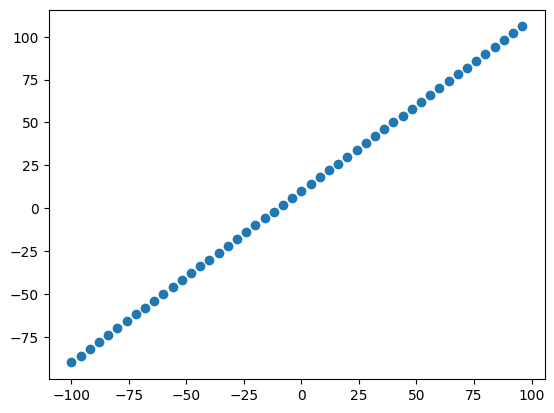

In [68]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y);

In [ ]:
### The 3 sets...